Files already downloaded and verified
Files already downloaded and verified


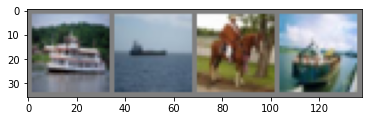

ship  ship  horse ship 


In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [22]:



def acc(n,testloader):

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = n(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return correct/total

In [30]:
class Nets(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


nets=Nets()

In [31]:
accSig=[]


In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(nets.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = nets(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    accSig.append(acc(nets,testloader))
    print(accSig)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.318
[1,  4000] loss: 2.303
[1,  6000] loss: 2.174
[1,  8000] loss: 2.035
[1, 10000] loss: 1.983
[1, 12000] loss: 1.926
Accuracy of the network on the 10000 test images: 33 %
[0.3338]
[2,  2000] loss: 1.827
[2,  4000] loss: 1.738
[2,  6000] loss: 1.680
[2,  8000] loss: 1.614
[2, 10000] loss: 1.587
[2, 12000] loss: 1.545
Accuracy of the network on the 10000 test images: 43 %
[0.3338, 0.4396]
[3,  2000] loss: 1.511
[3,  4000] loss: 1.472
[3,  6000] loss: 1.467
[3,  8000] loss: 1.460
[3, 10000] loss: 1.432
[3, 12000] loss: 1.395
Accuracy of the network on the 10000 test images: 49 %
[0.3338, 0.4396, 0.4988]
[4,  2000] loss: 1.370
[4,  4000] loss: 1.373
[4,  6000] loss: 1.319
[4,  8000] loss: 1.345
[4, 10000] loss: 1.335
[4, 12000] loss: 1.306
Accuracy of the network on the 10000 test images: 52 %
[0.3338, 0.4396, 0.4988, 0.5215]
[5,  2000] loss: 1.249
[5,  4000] loss: 1.284
[5,  6000] loss: 1.269
[5,  8000] loss: 1.273
[5, 10000] loss: 1.241
[5, 12000] loss: 1.236
Accura

In [33]:
class Nets1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
accSig1=[]

nets1=Nets1()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(nets1.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = nets1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    accSig1.append(acc(nets1,testloader))
    print(accSig1)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.316
[1,  4000] loss: 2.315
[1,  6000] loss: 2.313
[1,  8000] loss: 2.314
[1, 10000] loss: 2.312
[1, 12000] loss: 2.311
Accuracy of the network on the 10000 test images: 10 %
[0.1]
[2,  2000] loss: 2.310
[2,  4000] loss: 2.310
[2,  6000] loss: 2.309
[2,  8000] loss: 2.309
[2, 10000] loss: 2.306
[2, 12000] loss: 2.308
Accuracy of the network on the 10000 test images: 10 %
[0.1, 0.1]
[3,  2000] loss: 2.307
[3,  4000] loss: 2.306
[3,  6000] loss: 2.306
[3,  8000] loss: 2.306
[3, 10000] loss: 2.306
[3, 12000] loss: 2.305
Accuracy of the network on the 10000 test images: 10 %
[0.1, 0.1, 0.1]
[4,  2000] loss: 2.306
[4,  4000] loss: 2.304
[4,  6000] loss: 2.305
[4,  8000] loss: 2.305
[4, 10000] loss: 2.304
[4, 12000] loss: 2.304
Accuracy of the network on the 10000 test images: 10 %
[0.1, 0.1, 0.1, 0.1]
[5,  2000] loss: 2.305
[5,  4000] loss: 2.305
[5,  6000] loss: 2.304
[5,  8000] loss: 2.304
[5, 10000] loss: 2.305
[5, 12000] loss: 2.304
Accuracy of the network on the 10000